In [1]:
import torch, os, math
import torchvision as tv
import torchvision.transforms.functional as tvf
from torchvision import io
import matplotlib.pyplot as plt
from torch.utils.cpp_extension import load_inline

In [3]:
img = io.read_image("../lectures-main/lecture_003/puppy.jpg")
print(img.shape)

torch.Size([3, 1330, 1920])


In [6]:
img[:3, :3, :4]

tensor([[[225, 225, 225, 225],
         [225, 225, 225, 225],
         [225, 225, 225, 225]],

        [[228, 228, 228, 228],
         [228, 228, 228, 228],
         [228, 228, 228, 228]],

        [[233, 233, 233, 233],
         [233, 233, 233, 233],
         [233, 233, 233, 233]]], dtype=torch.uint8)

In [6]:
def show_img(x, figsize=(4, 3), **kwargs):
    plt.figure(figsize=figsize)
    plt.axis("off")
    if len(x.shape) == 3:
        x = x.permute(1, 2, 0)  # CHW -> HWC
    plt.imshow(x.cpu(), **kwargs)


img2 = tvf.resize(img, 150, antialias=True)
ch, h, w = img2.shape
ch, h, w, h * w

NameError: name 'tvf' is not defined

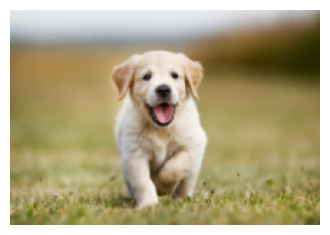

In [10]:
show_img(img2)

# RGB ->gRAY


In [1]:
import gzip, pickle
from urllib.request import urlretrieve
from pathlib import Path
from torch import tensor

In [2]:
MNIST_URL = "https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true"
path_data = Path("data")
path_data.mkdir(exist_ok=True)
path_gz = path_data / "mnist.pkl.gz"
if not path_gz.exists():
    urlretrieve(MNIST_URL, path_gz)

In [3]:
with gzip.open(path_gz, "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
    x_train, y_train, x_valid, y_valid = map(
        tensor, (x_train, y_train, x_valid, y_valid)
    )
x_train.shape, x_train.type()

(torch.Size([50000, 784]), 'torch.FloatTensor')

In [4]:
imgs = x_train.reshape((-1, 28, 28))
imgs.shape

torch.Size([50000, 28, 28])

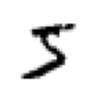

In [8]:
import matplotlib.pyplot as plt


def show_img(x, figsize=(4, 3), **kwargs):
    plt.figure(figsize=figsize)
    plt.axis("off")
    if len(x.shape) == 3:
        x = x.permute(1, 2, 0)  # CHW -> HWC
    plt.imshow(x.cpu(), **kwargs)


show_img(imgs[0], cmap="gray_r", figsize=(1, 1))

In [9]:
import torch

torch.manual_seed(1)
weights = torch.randn(784, 10)
weights

tensor([[-1.5256, -0.7502, -0.6540,  ..., -1.6091, -0.7121,  0.3037],
        [-0.7773, -0.2515, -0.2223,  ..., -1.1608,  0.6995,  0.1991],
        [ 0.8657,  0.2444, -0.6629,  ..., -1.4465,  0.0612, -0.6177],
        ...,
        [ 0.5063,  0.4656, -0.2634,  ...,  0.6452,  0.4298, -1.2936],
        [ 0.5171,  1.0315,  0.8120,  ..., -0.1046,  2.2588, -0.2793],
        [-1.4899,  0.3898, -0.5454,  ..., -0.1923, -0.5076,  0.5439]])